In [1]:
import pandas as pd              # for managing our dataset
import matplotlib.pyplot as plt  # for ploting somes pretties graphs
import numpy as np               # for managing our dataset
import seaborn as sns            # for somes combinaisons of graphics like hist*normal density
from scipy import stats          # for doing some statistics tests like jarque bera test

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.shape

(303, 14)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#### Analyse xploratire des données

In [7]:
###Statistique Uni-variée

In [8]:
## Variables quantitatives

In [9]:
#Age

In [13]:
data.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

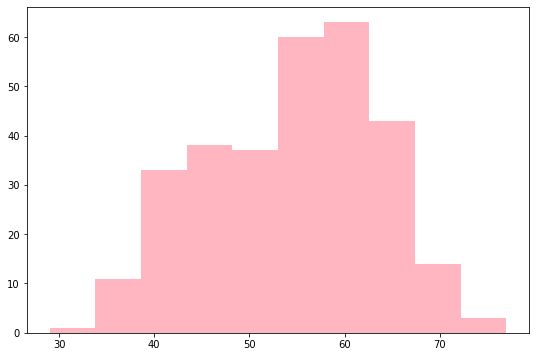

In [32]:
plt.figure(figsize=(9,6))
plt.hist(data.age, bins = 10, color = 'lightpink', lw = 2)
plt.show()

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

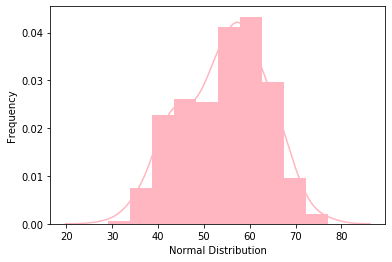

In [31]:
ax = sns.distplot(data.age, hist = True,
                  bins=10,
                  kde=True,
                  color='lightpink',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [35]:
#** H0 : the data is normaly distributed
#** H1 : the data isn't normaly distributed
stats.jarque_bera(data.age)
#**pvalue > 5% rejet de H0

(5.9104120157420095, 0.0520679330669892)

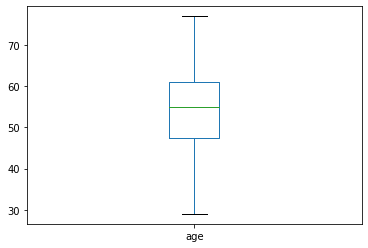

In [42]:
#** oultier values
data.age.plot.box()
#** There is no outlier in our age's varible

In [43]:
#Pression artérielle au repos (trestbps)

In [46]:
data.trestbps.describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

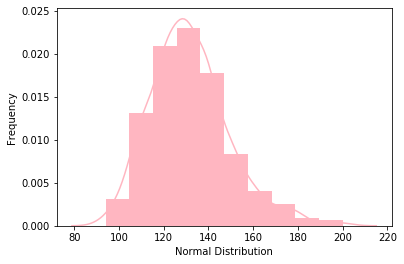

In [47]:
ax = sns.distplot(data.trestbps, hist = True,
                  bins=10,
                  kde=True,
                  color='lightpink',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [48]:
stats.jarque_bera(data.trestbps)
#** pvalue < 5% accetp H0 (observed statistics is less than calculated vaule)

(35.56519053640657, 1.8928534961659693e-08)

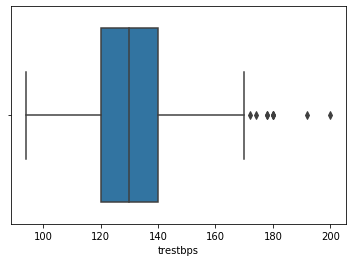

In [53]:
#Look for outlier
sns.boxplot(x = data.trestbps).

In [220]:
Q1 = data.trestbps.quantile(0.25)
Q3 = data.trestbps.quantile(0.75)
IQR = Q3 - Q1
d1 = Q1 - 1.5 * IQR
d2 = Q3 + 1.5 * IQR

out = data.trestbps[(data.trestbps < d1) | (data.trestbps > d2)]
pd.crosstab(index = out, columns = "counts")

col_0,counts
trestbps,
172,1
174,1
178,2
180,3
192,1
200,1


In [223]:
#** Test to confirm the outliers with Grubbs tests
#* H0 : There are no outlier in dataset
#* H0 : There is exactly one outlier in dataset
            #Statistic calculted statistics = max(|yi - mean(y)|)/(std(y))
            #Statistic observed statistics = max(|yi - (N-1)/sqrt(N) * (qrt((t(N)N-2)²)/(N-2 + (t(N)N-2)²))

#out = list(out) #Just for having the indexes of each elements

# The function of observed statistic grubb's test
def observed_grub_test(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * t_dist
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    #print(f'Grubbs critical value {critical_value}')
    return critical_value


# The function of calculated statistic grubb's test
def calculated_grub_test(dataset, outlier_list):
    outlier_list = list(outlier_list)
    std_vec = np.std(dataset)
    avg = np.mean(dataset)
    N = len(dataset)
    n = len(outlier_list)
    abs_value = [] # Initialise a list of all the differences between our dataset and the potential outlier
    grub_val = [] # The list value of the calculated test value
    value_out = [] # The list of the real outlier in out outlier potential list
    
    for i in range(n):
        abs_value.append(abs(outlier_list[i] - avg))
        grub_val.append(abs_value[i]/std_vec)
    return grub_val

# The decision function zho return outlier in our outlier list
def grubbs_test (dataset, outlier_list, alpha):
    outlier_list = list(outlier_list)
    N = len(dataset)
    n = len(outlier_list)
    value_out = [] # The list of the real outlier in out outlier potential list

    for i in range(n):
        if (calculated_grub_test(dataset, outlier_list)[i] > observed_grub_test(N,alpha)):
            value_out.append(outlier_list[i])
    return np.unique(value_out)


In [224]:
outlier = grubbs_test(data.trestbps, out, 0.05)
print(f'The outlier in this variable is {outlier}')

The outlier in this variable is [200]


In [206]:
# cholestérol sérique en mg / dl

In [207]:
data.chol.describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

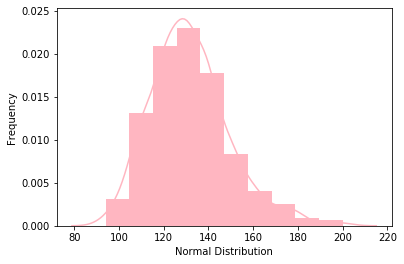

In [208]:
ax = sns.distplot(data.trestbps, hist = True,
                  bins=10,
                  kde=True,
                  color='lightpink',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [209]:
stats.jarque_bera(data.chol)
#** This variable have a normal distribution

(311.08859979946624, 0.0)

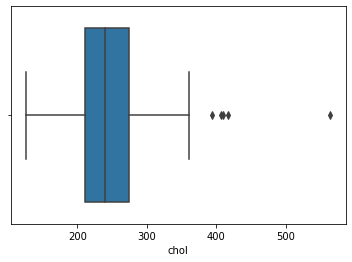

In [210]:
sns.boxplot(data.chol)

In [229]:
Q1 = data.chol.quantile(0.25)
Q3 = data.chol.quantile(0.75)
IQR = Q3 - Q1
d1 = Q1 - 1.5 * IQR
d2 = Q3 + 1.5 * IQR

out_chol = data.chol[(data.chol < d1) | (data.chol > d2)]
pd.crosstab(index = out_chol, columns = "counts")

col_0,counts
chol,
394,1
407,1
409,1
417,1
564,1


In [231]:
outlier_chol = grubbs_test(data.chol, out_chol, 0.05)
print(f'The outlier in this variable is {outlier_chol}')

The outlier in this variable is [564]


In [232]:
#Fréquence cardiaque maximale atteinte

In [233]:
data.thalach.describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

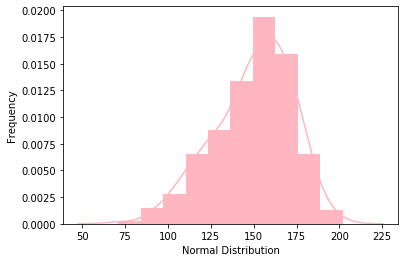

In [234]:
ax = sns.distplot(data.thalach , hist = True,
                  bins=10,
                  kde=True,
                  color='lightpink',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [235]:
stats.jarque_bera(data.thalach)
#** this variable has a normal distribution

(14.522813656458656, 0.0007021195788311507)

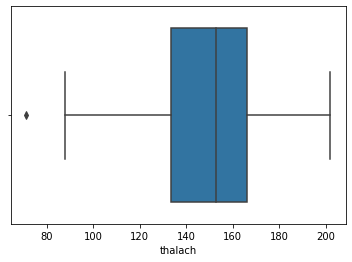

In [236]:
sns.boxplot(data.thalach)

In [237]:
Q1 = data.thalach.quantile(0.25)
Q3 = data.thalach.quantile(0.75)
IQR = Q3 - Q1
d1 = Q1 - 1.5 * IQR
d2 = Q3 + 1.5 * IQR

out_thalach = data.thalach[(data.thalach < d1) | (data.thalach > d2)]
pd.crosstab(index = out_thalach, columns = "counts")

col_0,counts
thalach,
71,1


In [243]:
outlier_thalach = grubbs_test(data.thalach, out_thalach, 0.05)

if len(outlier_thalach) > 0 :
    print(f'The outlier in this variable is {outlier_thalach}')
else:
    print('There is no outlier in this variable')

There is no outlier in this variable


In [244]:
#Dépression st

In [245]:
data.oldpeak.describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

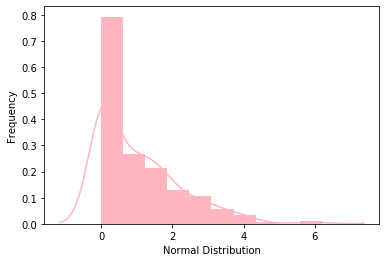

In [246]:
ax = sns.distplot(data.oldpeak , hist = True,
                  bins=10,
                  kde=True,
                  color='lightpink',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [247]:
stats.jarque_bera(data.oldpeak)
#** This variable has a normal distribution

(110.17162771033018, 0.0)

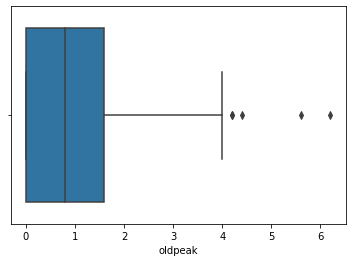

In [248]:
sns.boxplot(data.oldpeak)

In [249]:
Q1 = data.oldpeak.quantile(0.25)
Q3 = data.oldpeak.quantile(0.75)
IQR = Q3 - Q1
d1 = Q1 - 1.5 * IQR
d2 = Q3 + 1.5 * IQR

out_oldpeak = data.oldpeak[(data.oldpeak < d1) | (data.oldpeak > d2)]
pd.crosstab(index = out_oldpeak, columns = "counts")

col_0,counts
oldpeak,
4.2,2
4.4,1
5.6,1
6.2,1


In [250]:
outlier_oldpeak = grubbs_test(data.oldpeak, out_oldpeak, 0.05)

if len(outlier_oldpeak) > 0 :
    print(f'The outlier in this variable is {outlier_oldpeak}')
else:
    print('There is no outlier in this variable')

The outlier in this variable is [5.6 6.2]


In [251]:
## Qualitative variable

In [252]:
#sexe

In [5]:
data.sex = data['sex'].apply(str)
#data.sex = data.sex.astype("category").dtype

data.sex.describe()

count     303
unique      2
top         1
freq      207
Name: sex, dtype: object

In [6]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

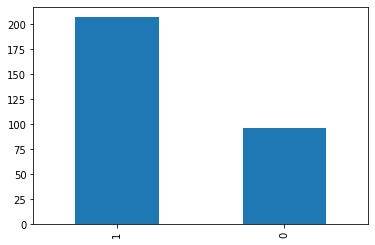

In [16]:
data['sex'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'pie graph of sexe')

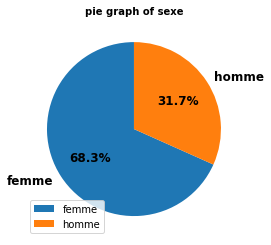

In [37]:
plt.figure(figsize=(5,4))
data.sex.value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=['C0','C1'],labels = ['femme', 'homme'],textprops={'fontweight':'bold','fontsize': 12});
plt.legend(loc=3,fontsize=10)
plt.ylabel('')
plt.title('pie graph of sexe',fontweight="bold",fontsize = 10)


In [7]:
#Types de douleurs thoracique

In [19]:
data['cp'] = data['cp'].apply(str)
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

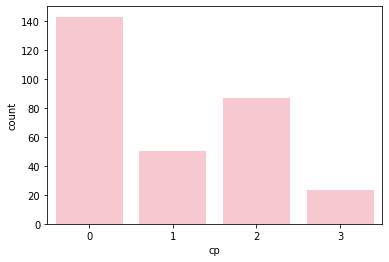

In [20]:
sns.countplot(data['cp'], color='pink')

Text(0.5, 1.0, 'pie graph of cp')

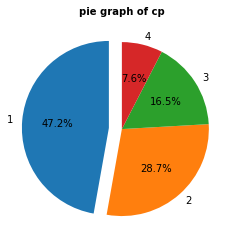

In [43]:
plt.pie(
    # using data total)arrests
    data['cp'].value_counts(),
    # with the labels being officer names
    labels= ('1','2','3','4'),
    # with no shadows
    shadow=False,
    # with colors
    colors=['C0','C1','C2','C3'],
    # with one slide exploded out
    explode=(0.15, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
plt.title('pie graph of cp',fontweight="bold",fontsize = 10)


In [ ]:
#Glycémie à jeun

In [23]:
data['fbs'] = data['fbs'].apply(str)
data['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

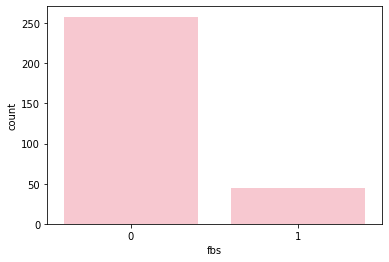

In [24]:
sns.countplot(data['fbs'], color = 'pink')

Text(0.5, 1.0, 'pie graph of glycémie à jeun > 120 mg / dl')

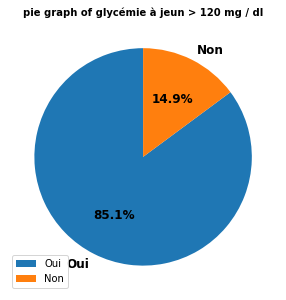

In [48]:
plt.figure(figsize=(6,5))
data.fbs.value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=['C0','C1'],labels = ['Oui', 'Non'],textprops={'fontweight':'bold','fontsize': 12});
plt.legend(loc=3,fontsize=10)
plt.ylabel('')
plt.title('pie graph of glycémie à jeun > 120 mg / dl',fontweight="bold",fontsize = 10)

In [50]:
# The result of electrcardio

In [54]:
data.restecg = data['restecg'].apply(str)
data['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

Text(0.5, 1.0, 'pie graph of result of electro cardiogramme au repos')

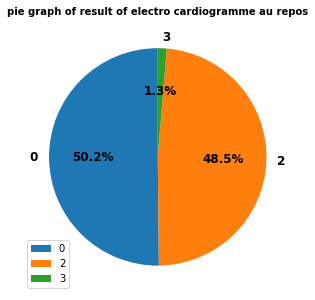

In [55]:
plt.figure(figsize=(6,5))
data.restecg.value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=['C0','C1','C2'],labels = ['0', '2', '3'],textprops={'fontweight':'bold','fontsize': 12});
plt.legend(loc=3,fontsize=10)
plt.ylabel('')
plt.title('pie graph of result of electro cardiogramme au repos',fontweight="bold",fontsize = 10)

In [56]:
# angine de poitrine induite par l'exercice 

In [58]:
data.exang = data['exang'].apply(str)
data['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

Text(0.5, 1.0, 'pie graph of angine de poitrine induite par exercice')

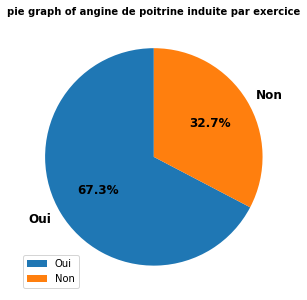

In [60]:
plt.figure(figsize=(6,5))
data.exang.value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=['C0','C1'],labels = ['Oui', 'Non'],textprops={'fontweight':'bold','fontsize': 12});
plt.legend(loc=3,fontsize=10)
plt.ylabel('')
plt.title('pie graph of angine de poitrine induite par exercice',fontweight="bold",fontsize = 10)

In [61]:
#pente du segment ST maximal de l'exercice

In [66]:
data.slope = data['slope'].apply(str)
data['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

Text(0.5, 1.0, 'pie graph of result of electro cardiogramme au repospente du segment ST maximal de exercice')

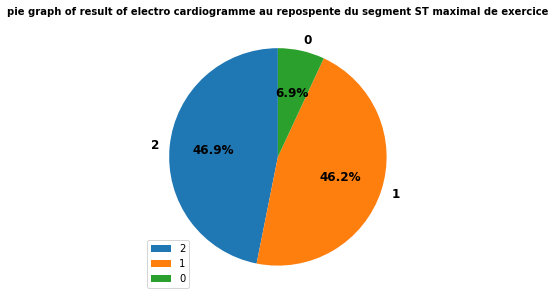

In [67]:
plt.figure(figsize=(6,5))
data.slope.value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=['C0','C1','C2'],labels = ['2', '1', '0'],textprops={'fontweight':'bold','fontsize': 12});
plt.legend(loc=3,fontsize=10)
plt.ylabel('')
plt.title('pie graph of result of electro cardiogramme au repospente du segment ST maximal de exercice',fontweight="bold",fontsize = 10)

In [114]:
data['ca'] = data['ca'].apply(str)
data['thal'] = data['thal'].apply(str)
data['target'] = data['target'].apply(str)

In [68]:
## bivaraiate analysis

#Quantitative * quantitative variables

In [71]:
# âge * pression artérielle au repos

(0.27935090656128836, 7.762269074809919e-07)

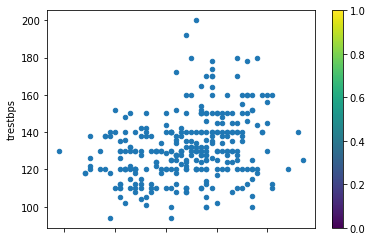

In [112]:
data.plot.scatter(x='age',
                      y='trestbps',
                      colormap='viridis')
stats.pearsonr(data.age, data.trestbps)
#** this coef is low and the pvalue studen's test is gratter than 5%. In fact we reject the association betwween these variables

In [ ]:
## Quantitative * qualitative variables

In [ ]:
# âge & sexe

In [122]:
data.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,96.0,55.677083,9.409396,34.0,49.75,57.0,63.0,76.0
1,207.0,53.758454,8.883803,29.0,47.00,54.0,59.5,77.0


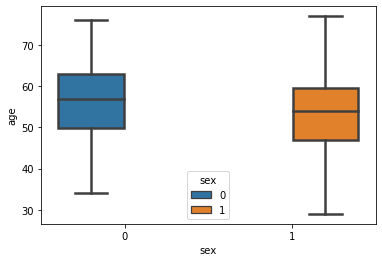

In [133]:
sns.boxplot(x = 'sex', y = 'age', data=data, hue="sex", linewidth=2.5)

In [ ]:
## Qualitative * qualitative

In [ ]:
# sexe * type de douleurs thoracique 

In [134]:
pd.crosstab(data.sex, data.cp)

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,52,19


In [139]:
#stats.chisquare(data.sex.value_counts, data.cp.value_counts, axis=0)
chi2_contingency(data.sex, data.cp)

NameError: name 'chi2_contingency' is not defined

In [115]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [116]:
data.select_dtypes(exclude='object').head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
